In [1]:
#! pip3 install mlflow

In [2]:
import mlflow
import os
from mlflow.tracking import MlflowClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#setting the username and password of mlflow server
os.environ['MLFLOW_TRACKING_USERNAME'] = 'mlflow'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'fusemlflow'
mlflow.tracking.set_tracking_uri('http://mlflow.fusemachines.com/')

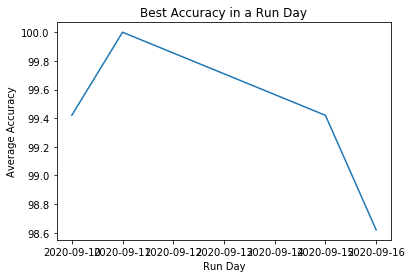

In [4]:
# Proctor
experiment19 = MlflowClient(tracking_uri='http://mlflow.fusemachines.com/').get_experiment(19)
runs19 = mlflow.search_runs(experiment19.experiment_id)
runs19.dropna(subset = ["metrics.acc_weighted_mean"], inplace=True)

runs19['Date'] = runs19['start_time'].dt.date
runs19.sort_values(by=['Date'], inplace=True, ascending=True)
#display(runs19[['Date','metrics.acc_weighted_mean']])
runs19_sliced = runs19[['Date','metrics.acc_weighted_mean']]
runs19_sliced_grouped = runs19_sliced['metrics.acc_weighted_mean'].groupby(runs19_sliced ['Date']).max()
#runs_19_sliced_grouped = runs_19_sliced_grouped.fillna(0)
#runs_19_sliced_grouped = pd.DataFrame(runs_19_sliced_grouped)

#fig1 = sns.lineplot(data=runs_19_sliced_grouped)
fig1 = plt.plot(runs19_sliced_grouped)
plt.xlabel('Run Day')
plt.ylabel('Average Accuracy')
plt.title('Best Accuracy in a Run Day')
plt.show()


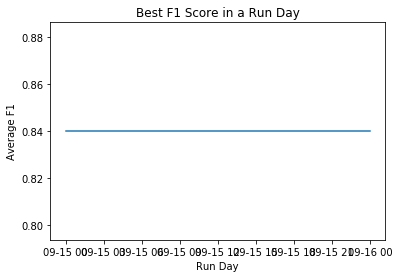

In [5]:
experiment17 = MlflowClient(tracking_uri='http://mlflow.fusemachines.com/').get_experiment(17)
runs17 = mlflow.search_runs(experiment17.experiment_id)
runs17.dropna(subset = ["metrics.avg-f1-score"], inplace=True)
runs17['Date'] = runs17['start_time'].dt.date
runs17.sort_values(by=['Date'], inplace=True, ascending=True)
#display(runs17[['Date','metrics.avg-f1-score']])


runs17_sliced = runs17[['Date','metrics.avg-f1-score']]
runs17_sliced_grouped = runs17_sliced['metrics.avg-f1-score'].groupby(runs17_sliced ['Date']).max()

#fig1 = sns.lineplot(data=runs_19_sliced_grouped)
fig1 = plt.plot(runs17_sliced_grouped)
plt.xlabel('Run Day')
plt.ylabel('Average F1')
plt.title('Best F1 Score in a Run Day')
plt.show()